# 📊 Day 5: Value at Risk (VaR) – Historical Method


## 🧠 Theory Recap
- **VaR** estimates the potential loss in value of a portfolio over a defined period for a given confidence interval.
- **Historical Method**: Uses past actual returns to simulate the distribution of possible losses.
- Does **not assume** a normal distribution of returns (non-parametric).
- Simply ranks past returns and finds the percentile cut-off based on confidence level (e.g., 5% for 95% confidence).


## 🛠️ What we'll Learn Today
- Load and clean historical price data
- Calculate daily returns
- Use historical returns to compute VaR at different confidence levels
- Interpret VaR result and limitations of the method


In [36]:
# Step 1: Load Data from yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download AAPL adjusted close data for the past 5 years
ticker = "AAPL"
df = yf.download(ticker, start="2018-01-01", progress=False)

# Use Adjusted Close and calculate returns
df['Return'] = df['Close'].pct_change()
df.dropna(inplace=True)

# Display last few rows
df.tail()


C:\Users\vedik\AppData\Local\Temp\ipykernel_3004\1561389042.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", progress=False)


Price,Close,High,Low,Open,Volume,Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2025-07-24,213.759995,215.690002,213.529999,213.899994,46022600,-0.001821
2025-07-25,213.880005,215.240005,213.399994,214.699997,40268800,0.000561
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000,0.000795
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700,-0.012988
2025-07-30,208.300003,212.389999,207.720001,211.895004,27171281,-0.014058


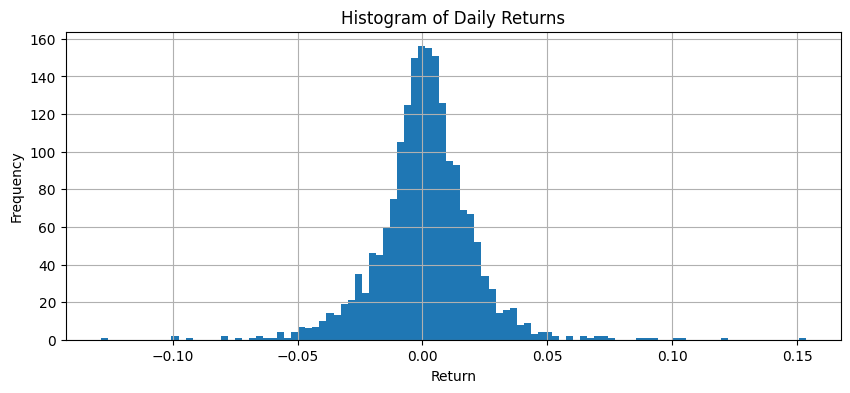

In [37]:
# Step 2: Plot Return Distribution
df['Return'].hist(bins=100, figsize=(10,4))
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [38]:
# Step 3: Calculate Historical VaR
confidence_levels = [0.90, 0.95, 0.99]
for cl in confidence_levels:
    var = df['Return'].quantile(1 - cl)
    print(f"Historical VaR at {int(cl*100)}% confidence: {var:.2%}")

Historical VaR at 90% confidence: -2.07%
Historical VaR at 95% confidence: -3.00%
Historical VaR at 99% confidence: -5.04%


## 📌 Key Takeaways
- VaR at 95% means there's a 5% chance the portfolio will lose **more** than the VaR amount on any given day.
- Historical VaR captures **real** past market movements, including fat tails and skewness.
- Limitation: Assumes future will resemble the past (not ideal during regime shifts).
